# Portfolio

Portfolio is allocation of your money in various assets. An example of portfolio is:
```
1. Portfolio A
    i. 20% Apple Stocks
    ii. 30% Microsoft Stocks
    iii. 50% Alibaba Stocks

2. Portfolio B
    i. 20% Intel Stocks
    ii. 30% Bitcoin
    iii. 50% Infosys Stocks
```
Note that it always sums up to 1 or 100%. In the end we have to make a choice of which portfolio to choose. 

### Daily Returns

The percent returned from today to the next day in stock. 

### Cummulative Returns

The percentage returned after a period of time


# Sharpe Ratio

Sharpe Ratio is a measure for calculating risk-adjusted return. This ratio is used to compare models when the risk is high and returns are also high. Basically it says: how much money am I getting given that I am taking x amount of risk.

### $$S = \frac{R_p - R_f}{\sigma_p}$$

Where, 

1. Rp is the Expected Portfolio Return
2. Rf is the Risk Free Return. Eg. if you would instead invest in a government bond which is risk free.
3. sigma is the standard deviation of the portfolio indicating the volatility. 

Note: be careful when the stddev is too less, then the portfolio will have a high sharpe ratio

This metric is meant to be used yearly. That is, the Rp is the expected return annually. But if you want to used this quarterly, or daily multiply the SR with $\sqrt{N}$ where n is number of days.

ASR:
1. Weekly: $\sqrt{52}$ * SR. Because there are 52 weeks in a year. 
2. Daily: $\sqrt{252}$ * SR. Because there are 252 working days.
3. Monthly: $\sqrt{12}$ * SR For 12 months.

In [1]:
import pandas as pd
import datetime
import quandl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

# Enter your quandl API key here
# quandl.ApiConfig.api_key = open("quandl_code", "r").read()

In [2]:
# set default size for plots
matplotlib.rcParams['figure.figsize'] = (16, 8)

In [3]:
start_date = pd.to_datetime("2012-01-01")
end_date = pd.to_datetime("2017-01-01")

In [5]:
aapl = quandl.get("WIKI/AAPL.11", start_date=start_date, end_date=end_date)
cisco = quandl.get("WIKI/CSCO.11", start_date=start_date, end_date=end_date)
ibm = quandl.get("WIKI/IBM.11", start_date=start_date, end_date=end_date)
amzn = quandl.get("WIKI/AMZN.11", start_date=start_date, end_date=end_date)

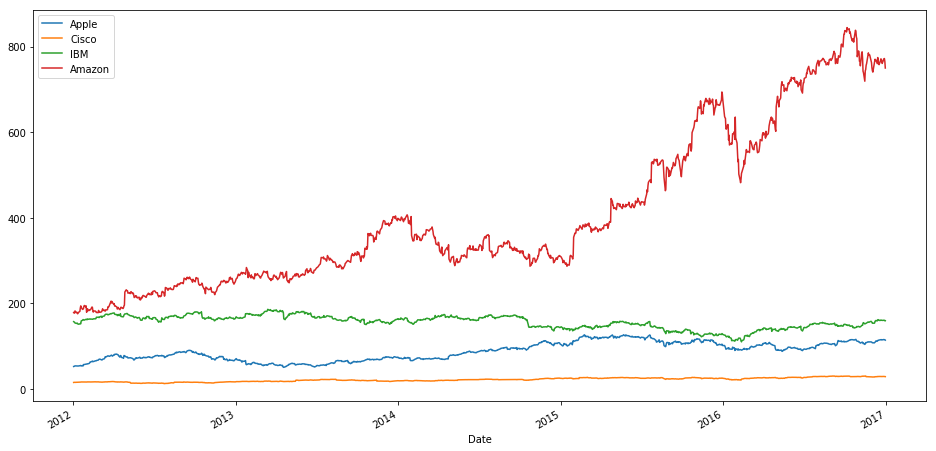

In [21]:
ax = aapl.plot()
cisco.plot(ax=ax)
ibm.plot(ax=ax)
amzn.plot(ax=ax)
ax.legend(["Apple", "Cisco", "IBM", "Amazon"]);

### Normalized returns

In [22]:
for stock in (aapl, cisco, ibm, amzn):
    stock["Normed Return"] = stock["Adj. Close"] / stock.iloc[0]["Adj. Close"]

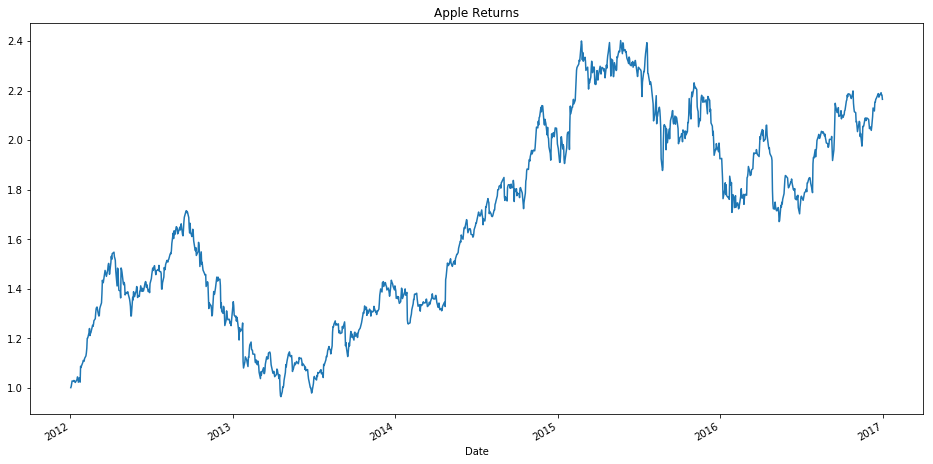

In [30]:
aapl["Normed Return"].plot();
plt.title("Apple Returns");

## Investing in Portfolio

Consider you have $1m to start with and you decide to invest in the following portfolio:

1. Amazon: 30%
2. IBM: 30%
3. Apple: 20%
4. Cisco: 20%

In [33]:
returns_df = pd.concat([aapl["Normed Return"], ibm["Normed Return"], amzn["Normed Return"], cisco["Normed Return"]], axis=1)
returns_df.columns = ["Apple", "IBM", "Amazon", "Cisco"]
returns_df.head()

,Apple,IBM,Amazon,Cisco
Date,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.005374,0.995921,0.991510,1.019324
2012-01-05,1.016536,0.991197,0.992068,1.015566
2012-01-06,1.027162,0.979817,1.019997,1.011809
2012-01-09,1.025533,0.974718,0.997375,1.018250


In [34]:
returns_df["Amazon"] = returns_df["Amazon"] * 300000
returns_df["IBM"] = returns_df["IBM"] * 300000
returns_df["Apple"] = returns_df["Apple"] * 200000
returns_df["Cisco"] = returns_df["Cisco"] * 200000
returns_df.head()

,Apple,IBM,Amazon,Cisco
Date,,,,
2012-01-03,200000.000000,300000.000000,300000.000000,200000.000000
2012-01-04,201074.824308,298776.167472,297452.940848,203864.734300
2012-01-05,203307.151716,297359.098229,297620.510529,203113.258186
2012-01-06,205432.483039,293945.249597,305998.994582,202361.782072
2012-01-09,205106.631326,292415.458937,299212.422499,203650.026838


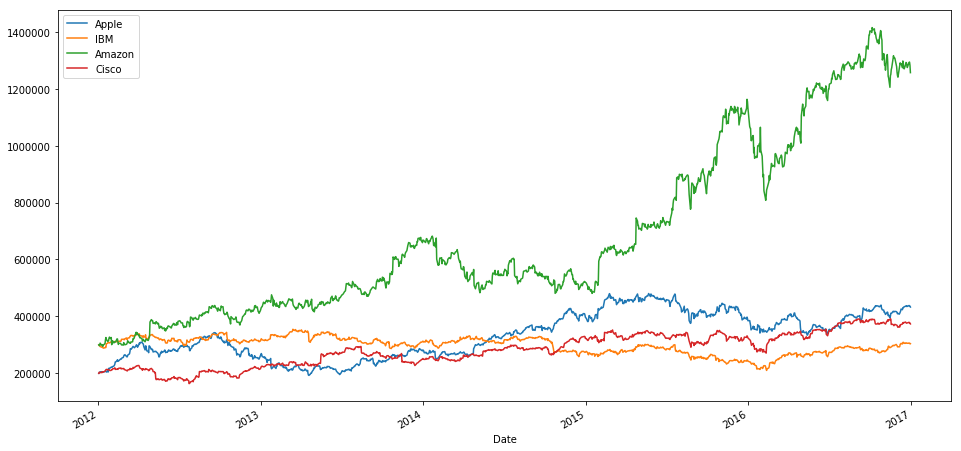

In [36]:
returns_df.plot();

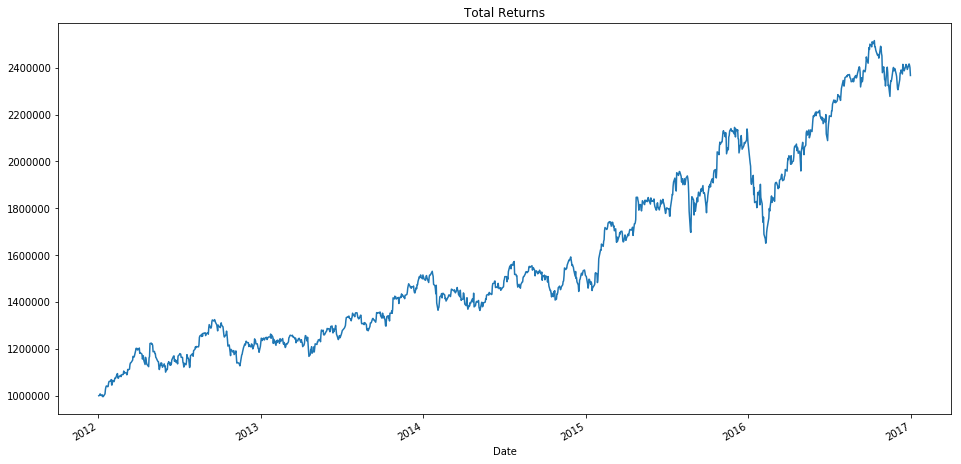

In [43]:
returns_df["Total"] = (returns_df["Amazon"] + returns_df["Apple"] + returns_df["IBM"] + returns_df["Cisco"])
returns_df["Total"].plot()
plt.title("Total Returns");

## Portfolio analysis


In [44]:
returns_df["Daily Change"] = returns_df["Total"].pct_change(1)
returns_df.head()

,Apple,IBM,Amazon,Cisco,Total,Daily Change
Date,,,,,,
2012-01-03,200000.000000,300000.000000,300000.000000,200000.000000,1.000000e+06,NaN
2012-01-04,201074.824308,298776.167472,297452.940848,203864.734300,1.001169e+06,0.001169
2012-01-05,203307.151716,297359.098229,297620.510529,203113.258186,1.001400e+06,0.000231
2012-01-06,205432.483039,293945.249597,305998.994582,202361.782072,1.007739e+06,0.006330
2012-01-09,205106.631326,292415.458937,299212.422499,203650.026838,1.000385e+06,-0.007297


In [45]:
std = returns_df["Daily Change"].std()
mean = returns_df["Daily Change"].mean()
print("Standard deviation of returns: {} Mean: {}".format(std, mean))

Standard deviation of returns: 0.011746475685682168 Mean: 0.0007546542444454382


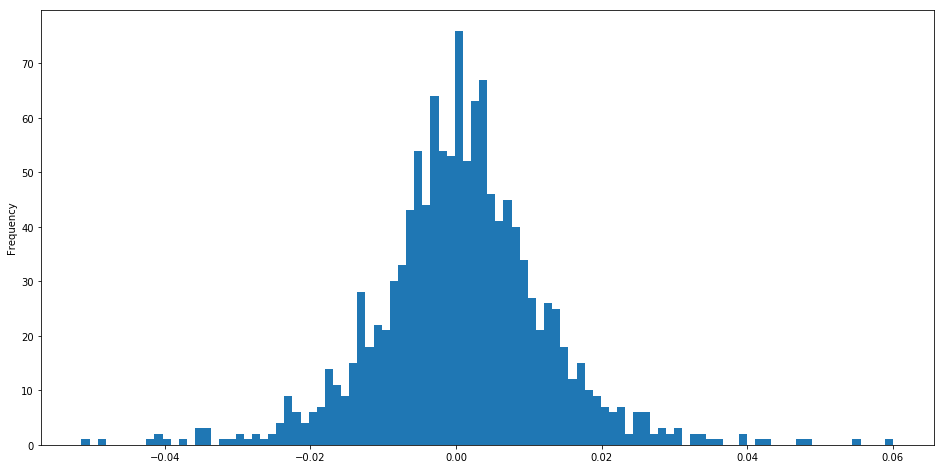

In [47]:
# visually
returns_df["Daily Change"].plot(kind="hist", bins=100);

#### Cummulative Returns

In [52]:
cumm = (returns_df["Total"].iloc[-1] / returns_df["Total"].iloc[0] - 1) * 100
print("Cummulative: {0:.3f} % returns".format(cumm))

Cummulative: 136.728 % returns


#### Sharpe Ratio

In [53]:
SR = mean/std
print("Sharpe Ratio: {}".format(SR))
ASR = (mean/std) * (252**0.5)
print("ASR: {}".format(ASR))

Sharpe Ratio: 0.06424516294408966
ASR: 1.019860344533301


## Maximizing Sharpe Ratio using Optimization



In [62]:
stocks = pd.concat([aapl["Adj. Close"], ibm["Adj. Close"], amzn["Adj. Close"], cisco["Adj. Close"]], axis=1)
stocks.columns = ["Apple", "IBM", "Amazon", "Cisco"]
stocks.head()

,Apple,IBM,Amazon,Cisco
Date,,,,
2012-01-03,52.848787,157.578371,179.03,15.617341
2012-01-04,53.132802,156.935540,177.51,15.919125
2012-01-05,53.722681,156.191208,177.61,15.860445
2012-01-06,54.284287,154.398046,182.61,15.801764
2012-01-09,54.198183,153.594506,178.56,15.902359


### Correlation between daily returns

In [64]:
stocks.pct_change(1).corr()

,Apple,IBM,Amazon,Cisco
Apple,1.000000,0.297498,0.235487,0.301990
IBM,0.297498,1.000000,0.258492,0.424672
Amazon,0.235487,0.258492,1.000000,0.284470
Cisco,0.301990,0.424672,0.284470,1.000000


### Using Log returns instead of ordinary returns

In [71]:
np.log(stocks.pct_change(1).head() + 1)

,Apple,IBM,Amazon,Cisco
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.004088,-0.008526,0.019139
2012-01-05,0.011041,-0.004754,0.000563,-0.003693
2012-01-06,0.010400,-0.011547,0.027763,-0.003707
2012-01-09,-0.001587,-0.005218,-0.022428,0.006346


In [72]:
stocks.pct_change(1).head()

,Apple,IBM,Amazon,Cisco
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.004079,-0.008490,0.019324
2012-01-05,0.011102,-0.004743,0.000563,-0.003686
2012-01-06,0.010454,-0.011481,0.028152,-0.003700
2012-01-09,-0.001586,-0.005204,-0.022178,0.006366
